### Principal Component Regression - PCR ### 

In statistics, principal component regression (PCR) is a regression analysis technique that is based on principal component analysis (PCA)

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

In [211]:
df=pd.read_csv('Breast_cancer_data.csv')
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [212]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [213]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [215]:
df[:5]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [217]:
y=df['diagnosis']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [218]:
X = df.loc[:,df.columns!='diagnosis']
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [220]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=42)

PCR for train data

In [221]:
from sklearn.decomposition import PCA

In [222]:
X_reduced_train=PCA().fit_transform(scale(X_train))

In [223]:
X_reduced_train

array([[-2.17588717e+00,  9.12520378e-01,  6.41453750e-01,
         2.19045157e-01,  2.84567200e-02],
       [ 3.88519608e+00,  2.50968399e-01,  1.12775580e+00,
        -1.23701859e-01,  4.94438499e-02],
       [-2.62862226e+00, -5.11159307e-01, -1.06057635e+00,
         1.93038933e-01,  7.50586833e-02],
       ...,
       [-5.04280283e-01, -1.68212950e+00, -1.53119664e+00,
        -6.87255806e-02, -1.52495522e-02],
       [ 7.10501569e-03,  5.89084849e-01,  4.74614459e-01,
        -8.98719056e-02, -1.66409865e-02],
       [-1.03456418e+00, -1.12145392e+00, -2.73467219e-03,
         1.27588164e-02, -1.39928059e-02]])

MODEL

In [224]:
from sklearn.linear_model import LinearRegression

In [225]:
linearreg=LinearRegression()

In [261]:
model_pcr=linearreg.fit(X_reduced_train, y_train)

In [262]:
model_pcr.intercept_

0.6285714285714286

In [263]:
model_pcr.coef_

array([-0.20529945, -0.05208063, -0.10623176,  0.50655768, -0.65421029])

PREDİCT

In [264]:
y_predict=model_pcr.predict(X_reduced_train)

In [239]:
y_predict[:5]

array([ 1.05195479, -0.39694005,  1.3561957 ,  0.80334715,  0.98454673])

Error value for train data

In [245]:
from sklearn.metrics import mean_squared_error,r2_score

In [247]:
np.sqrt(mean_squared_error(y_train, y_predict))

0.2883501089891297

r2 train value

In [248]:
r2_score(y_train, y_predict)

0.6438685767178227

PCR for test data

In [249]:
X_reduced_test=PCA().fit_transform(scale(X_test))

In [250]:
X_reduced_test[:5]

array([[-0.87192139,  0.12467108,  0.08975809, -0.03213548,  0.01138527],
       [ 2.26938614, -0.5228911 , -0.75668948,  0.04829623, -0.02784657],
       [ 0.63005612,  0.66912539,  0.19217461, -0.0793919 , -0.01061679],
       [-0.91352202,  0.56997025,  0.16335679, -0.05888645,  0.02575056],
       [-1.56129249,  0.63704042, -0.49838251,  0.0058322 ,  0.02162745]])

MODEL

We may use 'model_pcr' for test data and also use for train data.

In [265]:
model_pcr.coef_

array([-0.20529945, -0.05208063, -0.10623176,  0.50655768, -0.65421029])

In [266]:
model_pcr.intercept_

0.6285714285714286

PREDİCT

In [267]:
y_predict=model_pcr.predict(X_reduced_test)

Error value for train data

In [255]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.28317802915196744

r2 train value

In [256]:
r2_score(y_test, y_predict)

0.6586483487250818

In [257]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
68,9.029,17.33,58.79,250.5,0.10660
181,21.090,26.57,142.70,1311.0,0.11410
63,9.173,13.86,59.20,260.9,0.07721
248,10.650,25.22,68.01,347.0,0.09657
60,10.170,14.88,64.55,311.9,0.11340
...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783
106,11.640,18.33,75.17,412.5,0.11420
270,14.290,16.82,90.30,632.6,0.06429
435,13.980,19.62,91.12,599.5,0.10600


Validation for Pcr

In [277]:
X_reduced_train[:,0:1]
model_pcr=linearreg.fit(X_reduced_train[:,0:1], y_train)
y_predict=model_pcr.predict(X_reduced_test[:,0:1])
np.sqrt(mean_squared_error(y_test, y_predict))

0.293248434382178

In [278]:
X_reduced_train[:,0:10]
model_pcr=linearreg.fit(X_reduced_train[:,0:10], y_train)
y_predict=model_pcr.predict(X_reduced_test[:,0:10])
np.sqrt(mean_squared_error(y_test, y_predict))

0.28317802915196744

In [308]:
from sklearn import model_selection

In [309]:
cv=model_selection.KFold(n_splits=10,shuffle=True,random_state=1)

In [329]:
lg=LinearRegression()

In [330]:
RMSE= []

In [331]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score=np.sqrt(-1*model_selection.cross_val_score(lg, X_reduced_train[:,:i], y_train.ravel(), cv=cv, scoring='neg_mean_squared_error'))
    RMSE.append(score)

In [332]:
import matplotlib.pyplot as plt

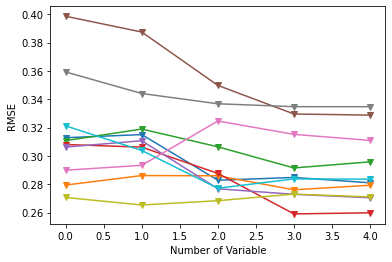

In [335]:
plt.plot(RMSE, '-v')
plt.xlabel('Number of Variable')
plt.ylabel('RMSE');

In [336]:
X_reduced_train[:,0:3]

array([[-2.17588717e+00,  9.12520378e-01,  6.41453750e-01],
       [ 3.88519608e+00,  2.50968399e-01,  1.12775580e+00],
       [-2.62862226e+00, -5.11159307e-01, -1.06057635e+00],
       ...,
       [-5.04280283e-01, -1.68212950e+00, -1.53119664e+00],
       [ 7.10501569e-03,  5.89084849e-01,  4.74614459e-01],
       [-1.03456418e+00, -1.12145392e+00, -2.73467219e-03]])

In [338]:
model_pcr=linearreg.fit(X_reduced_train[:,0:3], y_train)
y_predict=model_pcr.predict(X_reduced_train[:,0:3])
np.sqrt(mean_squared_error(y_train, y_predict))

0.2970047305398864

In [339]:
y_predict=model_pcr.predict(X_reduced_test[:,0:3])
np.sqrt(mean_squared_error(y_test, y_predict))

0.2845957530032231

### Partial Least Squares - PLS ###

Pls is used on supervised Machine Learning problems and Psr is used on unsupervised Machine Learning projects.

In [341]:
X_train.shape

(455, 5)

In [342]:
X_test.shape

(114, 5)

In [343]:
y_train.shape

(455,)

In [344]:
y_test.shape

(114,)

Create a model

In [345]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [346]:
model_pls=PLSRegression().fit(X_train, y_train)

In [347]:
model_pls.coef_

array([[-0.09962718],
       [-0.10624608],
       [-0.10666163],
       [-0.08473678],
       [-0.12961871]])

Predict

It means, there are my predict y values(y=df['diagnosis'])

Train Value Error

In [352]:
y_predict=model_pls.predict(X_train)
y_predict

array([[ 0.95862775],
       [-0.30231245],
       [ 1.31032229],
       [ 0.74635576],
       [ 0.88427234],
       [ 0.21724634],
       [ 0.66547533],
       [ 0.93612142],
       [ 0.9039172 ],
       [ 0.06213141],
       [ 0.78569134],
       [ 0.01151311],
       [ 0.44322223],
       [ 1.05027317],
       [ 0.90931475],
       [ 0.03896597],
       [ 0.30949664],
       [ 0.16297506],
       [ 0.93696522],
       [ 0.9025894 ],
       [ 0.83745783],
       [ 0.55070125],
       [ 0.59806279],
       [ 0.79541557],
       [ 0.53313777],
       [ 0.55707676],
       [ 0.82168926],
       [ 0.05870466],
       [ 1.06552841],
       [ 1.13495043],
       [ 0.51477722],
       [ 0.95508862],
       [ 0.07700909],
       [ 0.07846912],
       [ 0.5193842 ],
       [ 0.82490126],
       [ 0.54101669],
       [ 0.97105286],
       [ 1.22873283],
       [ 0.6561876 ],
       [ 0.91133255],
       [-0.42750502],
       [ 0.02477929],
       [ 1.3815212 ],
       [ 0.70631457],
       [ 1

In [353]:
np.sqrt(mean_squared_error(y_train, y_predict))

0.2966810131502367

In [354]:
r2_score(y_train, y_predict)

0.6229928710988901

Test Value Error

In [357]:
y_predict=model_pls.predict(X_test)
y_predict

array([[ 0.74170754],
       [ 0.23976613],
       [ 0.39251074],
       [ 0.71476181],
       [ 0.91685079],
       [-0.36930658],
       [-0.19986937],
       [ 0.4357289 ],
       [ 0.67678367],
       [ 0.98016405],
       [ 0.63796321],
       [ 0.49743619],
       [ 0.67319572],
       [ 0.19820352],
       [ 1.00520771],
       [-0.20578458],
       [ 0.8049285 ],
       [ 0.88846534],
       [ 1.10796872],
       [-0.03424132],
       [ 0.69908328],
       [ 0.76555974],
       [-0.2646993 ],
       [ 1.03593643],
       [ 0.89696292],
       [ 0.5800824 ],
       [ 0.9546519 ],
       [ 0.77172076],
       [ 0.74753404],
       [ 0.13960237],
       [ 0.78778212],
       [ 0.98667797],
       [ 0.86245019],
       [ 0.77660346],
       [ 0.88316605],
       [ 0.85718563],
       [ 0.51969317],
       [ 1.11976172],
       [ 0.28909364],
       [ 0.53612205],
       [ 0.87287768],
       [ 0.33455357],
       [ 0.7872959 ],
       [ 0.89017708],
       [ 0.60870429],
       [ 0

In [358]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.28799852018248084

Model Tunning

Validation for Pcr

Create a validation method

In [359]:
cv=model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

Calculating error value for each variable

In [361]:
pls=PLSRegression(n_components=i)

In [362]:
RMSE=[]

In [364]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score=np.sqrt(-1*model_selection.cross_val_score(pls, X_reduced_train[:,:i], y_train.ravel(), cv=cv, scoring='neg_mean_squared_error'))
    RMSE.append(score)

c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:212: FutureWarning: As of version 0.24, n_components(5) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:212: FutureWarning: As of version 0.24, n_components(5) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:212: FutureWarning: As of version 0.24, n_components(5) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sk

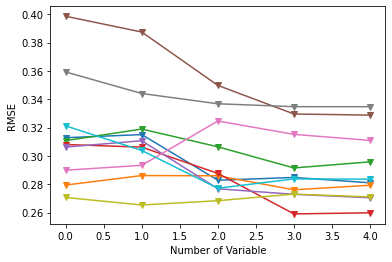

In [366]:
plt.plot(RMSE, '-v')
plt.xlabel('Number of Variable')
plt.ylabel('RMSE');

In [369]:
model_pls=PLSRegression(n_components=1).fit(X_train, y_train)

In [371]:
y_predict=model_pls.predict(X_test)

In [372]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.28649953066010636

### Ridge Regression - L2 regularization - Tunning Parameter ###

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

The ridge regression method rather than OLS because it provides a better estimate than OLS when independent variables are related without omitting any of the independent variables.

In [373]:
from sklearn.linear_model import Ridge 

In [430]:
model_ridge=Ridge(alpha=0.01).fit(X_train, y_train)

In [431]:
lambda_s=10**np.linspace(100,-25,1000)*0.05
ridge=Ridge()
coef_s=[]
for i in lambda_s:
    model_ridge.set_params(alpha=i)
    model_ridge.fit(X_train, y_train)
    coef_s.append(model_ridge.coef_)

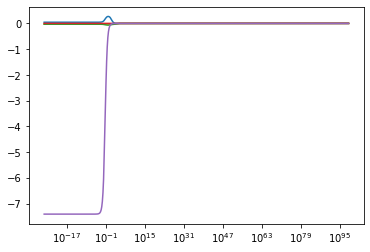

In [432]:
a=plt.gca()
a.plot(lambda_s, coef_s)
a.set_xscale('log')
plt.xlabel=('lambda')
plt.ylabel=('coef');

PREDİCT

We will predict on X_test data to find y_predict values,we can also predict on X_train data but does not give us optimum value,already do model tuning on X_test data to find optimum value/s for finally model.

In [433]:
y_predict=model_ridge.predict(X_test)
y_predict[:5]

array([0.72791857, 0.25504394, 0.3554493 , 0.67972128, 0.91853721])

In [434]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.2852459599606076

MODEL TUNİNG

In [435]:
lambda_ss=10**np.linspace(100,-25,1000)*0.05

In [436]:
from sklearn.linear_model import RidgeCV

We set on X_train data to find the optimum parameters for finally model

In [437]:
ridge_cv=RidgeCV(alphas=lambda_ss, scoring='neg_mean_squared_error', normalize=True)

In [438]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+98, 3.74839094e+98, 2.81008692e+98, 2.10666087e+98,
       1.57931770e+98, 1.18398003e+98, 8.87604006e+97, 6.65417362e+97,
       4.98848882e+97, 3.73976126e+97, 2.80361744e+97, 2.10181084e+97,
       1.57568174e+97, 1.18125423e+97, 8.85560532e+96, 6.63885415e+96,
       4.97700414e+96, 3.73115145e+96, 2.79716285e+96, 2.09697198e+96,
       1.57205415e+96, 1.17853471e+9...
       1.19219524e-24, 8.93762763e-25, 6.70034448e-25, 5.02310211e-25,
       3.76571008e-25, 2.82307071e-25, 2.11639453e-25, 1.58661482e-25,
       1.18945052e-25, 8.91705110e-26, 6.68491871e-26, 5.01153774e-26,
       3.75704053e-26, 2.81657134e-26, 2.11152209e-26, 1.58296206e-26,
       1.18671213e-26, 8.89652195e-27, 6.66952845e-27, 5.00000000e-27]),
        normalize=True, scoring='neg_mean_squared_error')

In [439]:
ridge_cv.alpha_

0.0007032636210526024

FİNALLY MODEL

In [440]:
finally_model=Ridge(alpha=ridge_cv.alpha_, normalize=True).fit(X_train, y_train)

In [441]:
finally_model_predict=finally_model.predict(X_test)

In [442]:
np.sqrt(mean_squared_error(y_test, finally_model_predict))

0.28441643378814485

### Lasso Regression ###

This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models.

In [443]:
X_train.shape

(455, 5)

In [444]:
X_test.shape

(114, 5)

In [445]:
y_train.shape

(455,)

In [446]:
y_test.shape

(114,)

MODEL

In [447]:
from sklearn.linear_model import Lasso

In [448]:
model_lasso=Ridge(alpha=0.01).fit(X_train, y_train)

In [449]:
model_lasso.coef_

array([ 8.40699263e-02, -2.36718927e-02, -3.75227309e-02,  8.91485503e-04,
       -6.28115015e+00])

In [473]:
lambda_s=10*np.linspace(10,-2,50)*0.05
lasso=Lasso()
coef_s=[]
for i in lambda_s:
    model_ridge.set_params(alpha=i)
    model_ridge.fit(X_train, y_train)
    coef_s.append(model_lasso.coef_)

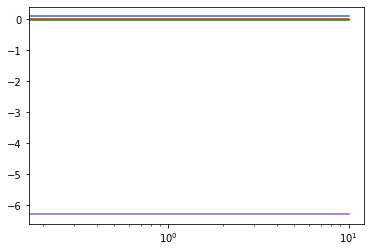

In [474]:
a=plt.gca()
a.plot(lambda_s*2, coef_s)
a.set_xscale('log')
plt.axis=('tight')
plt.xlabel=('lambda')
plt.ylabel=('weight');

PREDİCT

In [477]:
y_predict=model_lasso.predict(X_test)
y_predict

array([ 0.73056278,  0.25307264,  0.36579876,  0.68351083,  0.92087844,
       -0.47004505, -0.1763501 ,  0.40022152,  0.64871608,  0.90376323,
        0.64607691,  0.45926294,  0.65525304,  0.18220464,  0.9986294 ,
       -0.25324518,  0.78142822,  0.97098438,  1.38042786, -0.06620028,
        0.64294611,  0.78136705, -0.24609512,  1.09407066,  0.87418477,
        0.62903054,  0.89184543,  0.82825243,  0.75125144,  0.0978435 ,
        0.82002027,  1.00567527,  0.98719562,  0.76240333,  0.97161342,
        0.90065731,  0.50041293,  1.12113496,  0.26788881,  0.50063183,
        0.92959562,  0.33841708,  0.8074141 ,  0.89959184,  0.70984147,
        0.89528506,  0.93274299,  1.00179971,  0.77950757,  0.88811852,
        0.31338392, -0.04785746,  0.50748141,  0.57886727,  0.74652082,
        0.88506378,  0.96681904, -0.53651214,  0.54529423,  1.01994521,
        0.72245486,  0.01993312, -0.06285846,  0.60838896,  0.91494027,
        0.74874316,  0.15188744, -0.59922104,  0.86825798,  0.67

In [478]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.2852255285222847

MODEL TUNİNG

In [480]:
from sklearn.linear_model import LassoCV

In [481]:
lasso_cv_model=LassoCV(alphas=None, cv=10, max_iter=10000, normalize=True)

In [482]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [484]:
lasso_cv_model.alpha_

1.906087237876885e-05

FİNALLY MODEL

In [486]:
finally_model_lasso=Ridge(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

In [488]:
finally_model_lasso_predict=finally_model_lasso.predict(X_test)

In [489]:
np.sqrt(mean_squared_error(y_test, finally_model_lasso_predict))

0.2852452332798175

In [490]:
np.sqrt(mean_squared_error(y_test, finally_model_predict))

0.28441643378814485

### ElasticNet Regression ###

In [491]:
from sklearn.linear_model import ElasticNet

In [492]:
X_train.shape

(455, 5)

In [493]:
X_test.shape

(114, 5)

In [494]:
y_train.shape

(455,)

In [495]:
y_test.shape

(114,)

MODEL

In [496]:
model_ela=ElasticNet().fit(X_train, y_train)

In [497]:
model_ela.coef_

array([-0.        , -0.        , -0.00467397, -0.00062761, -0.        ])

PREDİCT

In [501]:
y_predict=model_ela.predict(X_test)
y_predict

array([ 0.78726332,  0.18181646,  0.52335995,  0.79433656,  0.86694517,
        0.0199681 , -0.14940923,  0.33178222,  0.7381118 ,  0.67668784,
        0.73804831,  0.40160367,  0.58917949,  0.44735982,  0.80572239,
        0.15485439,  0.59906796,  0.97054933,  1.1739869 ,  0.00373086,
        0.67946632,  0.82378452, -0.0892511 ,  0.98050874,  0.85993337,
        0.70687231,  0.72770161,  0.96006794,  0.77439171,  0.35165107,
        0.89709145,  0.82802724,  0.99744395,  0.69734331,  0.96784782,
        0.86923963,  0.48799568,  0.85354773,  0.25699757,  0.61078566,
        0.94270931,  0.56092557,  0.8598329 ,  0.84717246,  0.83917755,
        0.88110442,  1.02667254,  1.02147154,  0.85598049,  0.75150996,
        0.36449377,  0.20256746,  0.72973503,  0.6736883 ,  0.83200758,
        0.73758357,  0.95433775, -0.51152169,  0.70458206,  0.88760763,
        0.76213421,  0.10608726, -0.12322173,  0.63204766,  0.81325001,
        0.7769477 ,  0.48351349,  0.01569406,  0.84772936,  0.75

In [502]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.31022778233683956

MODEL TUNİNG

In [510]:
from sklearn.linear_model import ElasticNetCV

In [511]:
elastic_cv_model=ElasticNetCV(cv=10, random_state=0).fit(X_train, y_train)

In [512]:
elastic_cv_model.alpha_

0.23818676295133434

FINALLY MODEL

In [514]:
finally_model_elastic=ElasticNet(alpha=elastic_cv_model.alpha_).fit(X_train, y_train)

In [515]:
finally_model_elastic_predict=finally_model_elastic.predict(X_test)

In [517]:
np.sqrt(mean_squared_error(y_test, finally_model_elastic_predict))

0.2928099002193806